# Data Scientist Nanodegree by Udacity

## Project 1: Write a Data Science Blog Post

For this project, you will pick a dataset and choose 3 questions you aspire to answer from the data. Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

**Key Steps for Project** 

1. Pick a dataset.

2. Pose at least three questions related to business or real-world applications of how the data could be used.

3. Create a Jupyter Notebook, using any associated packages you'd like, to:

    Prepare data:
    - Gather necessary data to answer your questions.  
    - Handle categorical and missing data.
    - Provide insight into the methods you chose and why you chose them.  
        
   Analyze, model, and visualize:
    - Provide a clear connection between your business questions and how the data answers them.
        
    
4. Communicate your business insights:  

    - Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind.  
    - Create a blog post to share your questions and insights with a non-technical audience.


Your deliverables will be a GitHub repository and a blog post.

## Table of Contents

1. [Business Understanding](#BusinessUnderstanding)<br>
2. [Data Understanding](#DataUnderstanding)<br>
4. [Data Preparation](#DataPreparation)<br>
4. [Data Modeling](#DataModeling)<br>
5. [Evaluation](#Evaluation)<br>
6. [Deployment](#Deployment)

### <a class="anchor" id="BusinessUnderstanding">Part 1: Business Understanding</a>

Movie entertainment is a big business all over the world and I would like to use [The Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset) found on Kaggle (source [TMDB](https://www.themoviedb.org/)) to gain some insights on the Hollywood business.

Therefor I am going to answer following questions:

1. How have movie genres evolved over time?
2. How do novel based movies compare to non-novel based movies?
3. Which movies are the most expensive ones ever made? Did the investment pay off?
4. Which movies have the best return on investment?

### <a class="anchor" id="DataUnderstanding">Part 2: Data Understanding</a>
Let us have a first look at the data at hand for answering the posed questions:

In [1]:
# Imports
from helpers import *
import pandas as pd
from datetime import datetime

# Magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
# Load data
movies_metadata = pd.read_csv('data/movies_metadata.csv', sep=',')
movies_keywords = pd.read_csv('data/keywords.csv', sep=',')

/home/florian/anaconda3/envs/udacity_ds_cp/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# First look at movie metadata
movies_metadata.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [4]:
movies_metadata.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [5]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

The movie dataset includes 45.466 movies with 24 features. Following features will be used for the analysis:

In [6]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

| Field                  | Description                                  | 
| :----------------------|:---------------------------------------------| 
| id                     | unique movie identifier                      | 
| original_title         | original title of the movie                  | 
| title                  | translated title of the movie                | 
| release_date           | release date of the movie                    | 
| status                 | movie status (e.g. released)                 |
| vote_average           | average rating (TMDB user)                   | 
| vote_count             | number of ratings (TMDB user)                | 
| genres                 | movie genres (multiple possible)             | 
| budget                 | movie budget in US-Dollar                    | 
| revenue                | movie revenue US-Dollar                      | 
  

In [7]:
# Select required columns for analysis
columns = ['id', 'original_title', 'title', 'release_date', 'status', 
           'vote_average', 'vote_count', 'genres', 'budget', 'revenue']

movies = movies_metadata[columns].copy()

In [8]:
# Only interested in released movies
movies_metadata['status'].unique()
movies = movies[movies['status']=='Released']

In [9]:
# First look at keywords data
movies_keywords.head(1)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [10]:
# First look at keywords data
movies_keywords.describe()

,id
count,46419.000000
mean,109769.951873
std,113045.780256
min,2.000000
25%,26810.500000
50%,61198.000000
75%,159908.500000
max,469172.000000


In [11]:
movies_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
id          46419 non-null int64
keywords    46419 non-null object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


| Field                  | Description                                  | 
| :----------------------|:---------------------------------------------| 
| id                     | unique movie identifier                      | 
| keywords               | keywords associated with the movie           | 

### <a class="anchor" id="Data Preparation">Part 3: Data Preparation</a>
There is some cleaning required before we can analyse the data:  

**Step 1: Convert data types**    
We have to join the movie metadata on `id` with the keywords data. But the dtypes do not match, so this will not work out of the box.

In [12]:
# Check data types
print('Movie datatypes:')
display(movies.dtypes)

print('Keywords datatypes:')
display(movies_keywords.dtypes)

Movie datatypes:


id                 object
original_title     object
title              object
release_date       object
status             object
vote_average      float64
vote_count        float64
genres             object
budget             object
revenue           float64
dtype: object

Keywords datatypes:


id           int64
keywords    object
dtype: object

- id and budget should be numeric
- release_date should be datetime

Let us fix this first.

In [13]:
# Convert movie id and budget to numeric
movies['id'] = pd.to_numeric(movies['id'], errors='coerce', downcast='integer')
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce', downcast='integer')

In [14]:
# Convert release_date to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [15]:
movies.dtypes

id                         int32
original_title            object
title                     object
release_date      datetime64[ns]
status                    object
vote_average             float64
vote_count               float64
genres                    object
budget                     int32
revenue                  float64
dtype: object

In [16]:
# Join movies and keywords
movies = movies.merge(movies_keywords, on='id', how='left')
movies.head(1)

,id,original_title,title,release_date,status,vote_average,vote_count,genres,budget,revenue,keywords
0,862,Toy Story,Toy Story,1995-10-30,Released,7.7,5415.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,373554033.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


**Step 2: Clean stringified json columns**    
Columns genres and keywords have to be cleaned.

In [17]:
movies[['genres', 'keywords']].head(3)

,genres,keywords
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [18]:
movies['genres'] = parse_json(movies['genres'])
movies['keywords'] = parse_json(movies['keywords'])

In [19]:
movies[['genres', 'keywords']].head(3)

,genres,keywords
0,"[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva..."
1,"[Adventure, Fantasy, Family]","[board game, disappearance, based on children'..."
2,"[Romance, Comedy]","[fishing, best friend, duringcreditsstinger, o..."


**Step 3: Investigate missing and odd values**

In [20]:
# Revenue and budget
print('Budget:')
display(movies['budget'].describe())

print('Revenue:')
display(movies['revenue'].describe())

Budget:


count    4.602300e+04
mean     4.205710e+06
std      1.737462e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

Revenue:


count    4.602300e+04
mean     1.115491e+07
std      6.420524e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

While zero revenue and budget could be possible I will replace these values with NaN, because for the majority of data zero probably means missing data.

In [21]:
# Set budget and revenue NaN if it is 0
movies['budget'] = movies['budget'].replace(0, np.nan)
movies['revenue'] = movies['revenue'].replace(0, np.nan)

In [22]:
# Check missing values by column
movies.isnull().sum()

id                    0
original_title        0
title                 0
release_date         78
status                0
vote_average          0
vote_count            0
genres                0
budget            37037
revenue           38539
keywords              0
dtype: int64

In [23]:
# Checking release_date
movies[movies['release_date'].isnull()].describe()

,id,vote_average,vote_count,budget,revenue
count,78.000000,78.000000,78.000000,4.000000e+00,0.0
mean,290017.666667,2.341026,2.371795,8.425050e+05,NaN
std,128162.483344,3.446829,11.360800,1.152915e+06,NaN
min,36663.000000,0.000000,0.000000,2.000000e+01,NaN
25%,171987.500000,0.000000,0.000000,9.000500e+04,NaN
50%,337703.000000,0.000000,0.000000,4.350000e+05,NaN
75%,405440.000000,5.750000,1.000000,1.187500e+06,NaN
max,456956.000000,10.000000,91.000000,2.500000e+06,NaN


For the 78 columns with missing release dates we only have 4 values for budget and no values for revenue. Since this makes the analysis difficult, these rows will be dropped.

In [24]:
movies = movies.drop(movies[movies['release_date'].isnull()].index)

**Step 4: Engineer decade column**  
For analyzing the movie data over time I want to look at changes over decades. Therefore a decade feature has to be engineered.

In [25]:
# Engineer decade column
movies['release_year'] = movies['release_date'].dt.year.astype('Int64') 
movies['release_decade'] = (movies['release_year']/10).astype(int)*10

**Step 5: Engineer genre columns**  
At the moment the genres for a movie are stored as a list in the genre field. The genre information has to be split into individual columns and to be one-hot-encoded.

In [26]:
engineer_genre_columns(movies)
movies.head(1)

,id,original_title,title,release_date,status,vote_average,vote_count,genres,budget,revenue,...,Animation,TV Movie,Science Fiction,Romance,Action,Comedy,Adventure,Mystery,Crime,Drama
0,862,Toy Story,Toy Story,1995-10-30,Released,7.7,5415.0,"[Animation, Comedy, Family]",30000000.0,373554033.0,...,1,0,0,0,0,1,0,0,0,0


**Step 6: Engineer a flag for is_novel_based**  
One question is about comparing novel based vs. non-novel-based movie. If a movie is novel-based `novel` is on of the the keywords. Therefore this information has to be extracted.

In [27]:
movies['is_novel_based'] = movies['keywords'].apply(lambda x: any('novel' in s for s in x))
movies.head(1)

,id,original_title,title,release_date,status,vote_average,vote_count,genres,budget,revenue,...,TV Movie,Science Fiction,Romance,Action,Comedy,Adventure,Mystery,Crime,Drama,is_novel_based
0,862,Toy Story,Toy Story,1995-10-30,Released,7.7,5415.0,"[Animation, Comedy, Family]",30000000.0,373554033.0,...,0,0,0,0,1,0,0,0,0,False


In [28]:
# During further analysis it was discovered that a few movies do not have the correct flag
movies.at[movies['title'] == 'Harry Potter and the Deathly Hallows: Part 2', 'is_novel_based'] = True
movies.at[movies['title'] == 'Beauty and the Beast', 'is_novel_based'] = True

**Step 7: Fix wrong revenue and budget data**

In [29]:
# During further analysis it was discovered that a some moves have wrong budget or revenue information (source: TMDB)
movies.at[movies['title'] == 'Modern Times', 'budget'] = 1500000
movies.at[movies['title'] == 'Less Than Zero', 'budget'] = np.nan
movies.at[movies['title'] == 'Welcome to Dongmakgol', 'budget'] = 8000000
movies.at[movies['title'] == 'Aquí Entre Nos', 'budget'] = np.nan
movies.at[movies['title'] == 'The Karate Kid, Part II', 'budget'] = 13000000
movies.at[movies['title'] == 'Nurse 3-D', 'budget'] = np.nan
movies.at[movies['title'] == 'From Prada to Nada', 'budget'] = np.nan
movies.at[movies['title'] == 'Love, Wedding, Marriage', 'budget'] = np.nan
movies.at[movies['title'] == "The Tiger: An Old Hunter's Tale", 'budget'] = np.nan
movies.at[movies['title'] == 'Eraserhead', 'budget'] = 100000

**Step 8: Engineer profit and ROI columns**  
In order to analyze movie performance profit and return on investment information will be required.

In [30]:
# Convert budget and revenue to millions and create a profit column
movies['revenue ($M)'] = movies['revenue'] / 1000000
movies['budget ($M)'] = movies['budget'] / 1000000
movies['profit ($M)'] = (movies['revenue'] - movies['budget']) / 1000000
movies['roi (%)'] = (movies['revenue ($M)'] / movies['budget ($M)']) * 100

### <a class="anchor" id="Data Modeling">Part 4: Data Modeling</a>

**Question 1: How have movie genres evolved over time?**

In [31]:
# Investigate how many movies have been produced for each genre by decade
distinct_genres = set(itertools.chain.from_iterable(movies["genres"]))

genre_rank_decade = movies.groupby(
    'release_decade').sum()[distinct_genres].rank(ascending=False, axis=1, method='dense')
genre_rank_decade

,History,Documentary,Horror,Fantasy,Music,Foreign,Western,War,Thriller,Family,Animation,TV Movie,Science Fiction,Romance,Action,Comedy,Adventure,Mystery,Crime,Drama
release_decade,,,,,,,,,,,,,,,,,,,,
1870,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1880,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1890,7.0,1.0,4.0,2.0,8.0,8.0,8.0,8.0,8.0,6.0,7.0,8.0,7.0,7.0,7.0,3.0,8.0,8.0,8.0,5.0
1900,9.0,2.0,3.0,1.0,8.0,10.0,9.0,10.0,8.0,9.0,7.0,10.0,5.0,8.0,5.0,1.0,5.0,10.0,6.0,4.0
1910,7.0,12.0,9.0,4.0,14.0,14.0,7.0,7.0,14.0,13.0,8.0,14.0,11.0,3.0,8.0,2.0,6.0,10.0,5.0,1.0
1920,12.0,9.0,5.0,8.0,15.0,17.0,11.0,13.0,10.0,16.0,13.0,17.0,14.0,3.0,6.0,2.0,4.0,14.0,7.0,1.0
1930,11.0,18.0,12.0,16.0,8.0,19.0,10.0,13.0,9.0,15.0,14.0,19.0,17.0,3.0,6.0,2.0,7.0,5.0,4.0,1.0
1940,15.0,17.0,12.0,13.0,9.0,19.0,10.0,7.0,4.0,14.0,16.0,19.0,18.0,3.0,8.0,2.0,11.0,6.0,5.0,1.0
1950,15.0,17.0,11.0,16.0,12.0,18.0,7.0,10.0,6.0,14.0,17.0,19.0,9.0,3.0,5.0,2.0,8.0,13.0,4.0,1.0


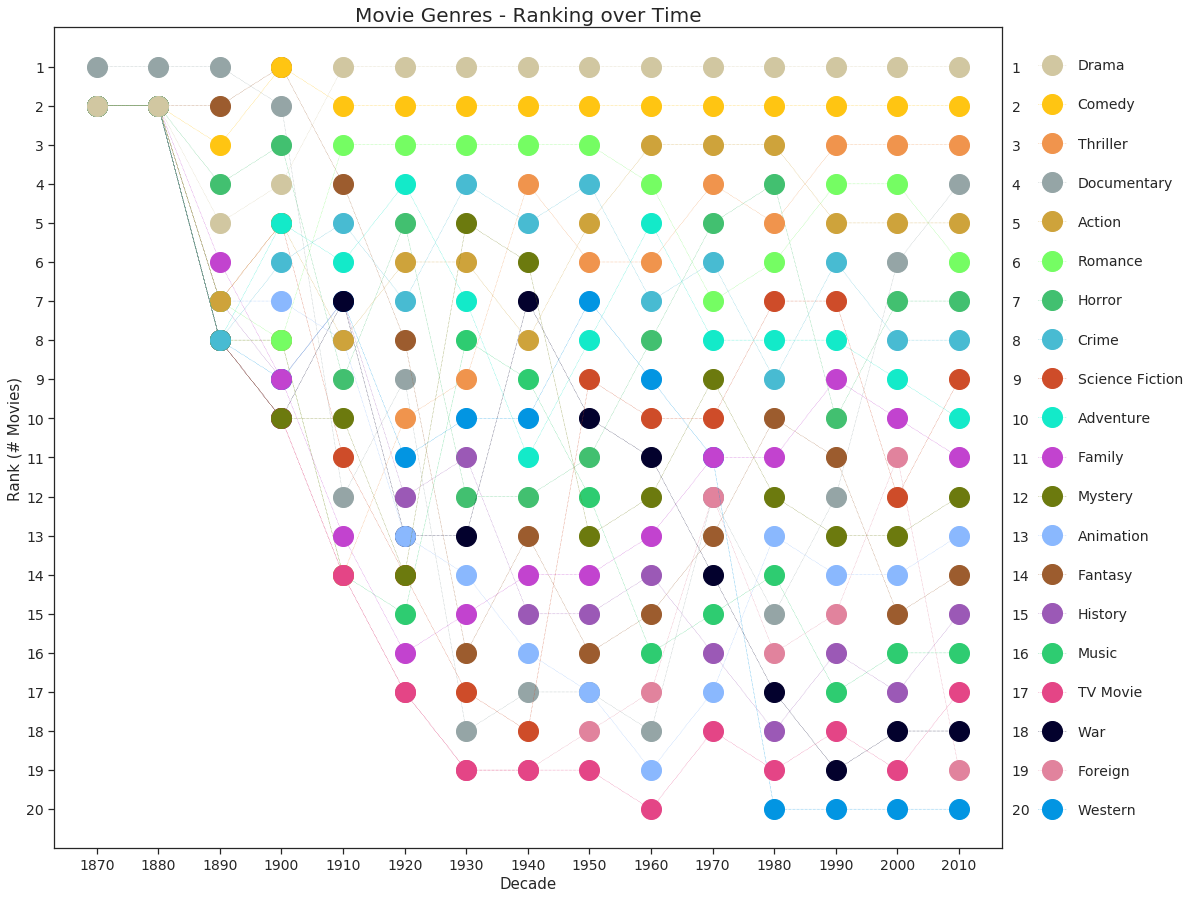

In [32]:
# Plot movie genres over time (a movie can belong to multiple genres)
plot_genres_over_time(genre_rank_decade)

**Question 2: How do novel based movies compare to non-novel based movies?**

In [33]:
# For this comparison I will only look at movies which have complete data for vote_average, revenue, and budget
movies_subset = movies.dropna(subset=['vote_average', 'revenue', 'budget']).copy()

In [34]:
# Check which decade to start with
movies_subset.groupby('is_novel_based').agg(first_decade=('release_decade', 'min'))
movies_subset = movies_subset[movies_subset['release_decade'] >= 1930]

In [35]:
# Overall summary
movies_novel_summary = movies_subset.groupby('is_novel_based').agg(
    count=('id', 'count'), 
    vote_avg=('vote_average', 'mean'), 
    budget_avg=('budget ($M)', 'mean'),
    revenue_avg=('revenue ($M)', 'mean'),
    profit_avg=('profit ($M)', 'mean'))

movies_novel_summary['roi_avg'] = movies_novel_summary['profit_avg'] / movies_novel_summary['budget_avg']
movies_novel_summary

,count,vote_avg,budget_avg,revenue_avg,profit_avg,roi_avg
is_novel_based,,,,,,
False,5080,6.252835,30.523792,87.665893,57.142101,1.872051
True,322,6.547516,41.859204,137.138901,95.279697,2.276195


In [36]:
# Summary by decade
movies_novel_decade = movies_subset.groupby(['release_decade', 'is_novel_based']).agg(
        count=('id', 'count'), 
    vote_avg=('vote_average', 'mean'), 
    budget_avg=('budget ($M)', 'mean'),
    revenue_avg=('revenue ($M)', 'mean'),
    profit_avg=('profit ($M)', 'mean'))

movies_novel_decade['roi_avg'] = (movies_novel_decade['profit_avg'] / movies_novel_decade['budget_avg'])*100
movies_novel_decade

count  vote_avg  budget_avg  revenue_avg  \
release_decade is_novel_based                                             
1930           False              37  6.589189    1.033771    19.087565   
               True                3  7.066667    1.428000    12.068719   
1940           False              41  7.048780    1.724495    17.330707   
               True                4  7.025000    1.533500     7.546031   
1950           False              71  6.980282    2.746566    24.610727   
               True                4  6.775000    2.647500    74.747854   
1960           False             123  6.919512    6.063407    30.555061   
               True                7  7.400000    4.271429    28.425027   
1970           False             177  6.702825    6.420367    54.409034   
               True               13  6.323077    7.461538    39.888321   
1980           False             496  6.295565   13.655994    51.723730   
               True               23  6.647826   13.250000    35.606775   
1990           False             905  6.182983   29.223908    80.616108   
               True               36  6.558333   38.934876   112.585517   
2000           False            1701  6.147737   36.378887    90.768723   
               True               84  6.484524   53.273810   170.072029   
2010           False            1529  6.228254   37.784958   114.963872   
               True              148  6.514865   48.306421   161.606326   

                               profit_avg      roi_avg  
release_decade is_novel_based                           
1930           False            18.053795  1746.402178  
               True             10.640719   745.148366  
1940           False            15.606212   904.972731  
               True              6.012531   392.078970  
1950           False            21.864161   796.054388  
               True             72.100354  2723.337252  
1960           False            24.491654   403.925605  
               True             24.153599   565.468863  
1970           False            47.988667   747.444257  
               True             32.426783   434.585748  
1980           False            38.067736   278.762094  
               True             22.356775   168.730381  
1990           False            51.392200   175.856702  
               True             73.650641   189.163670  
2000           False            54.389835   149.509343  
               True            116.798219   219.241351  
2010           False            77.178914   204.258301  
               True            113.299906   234.544196

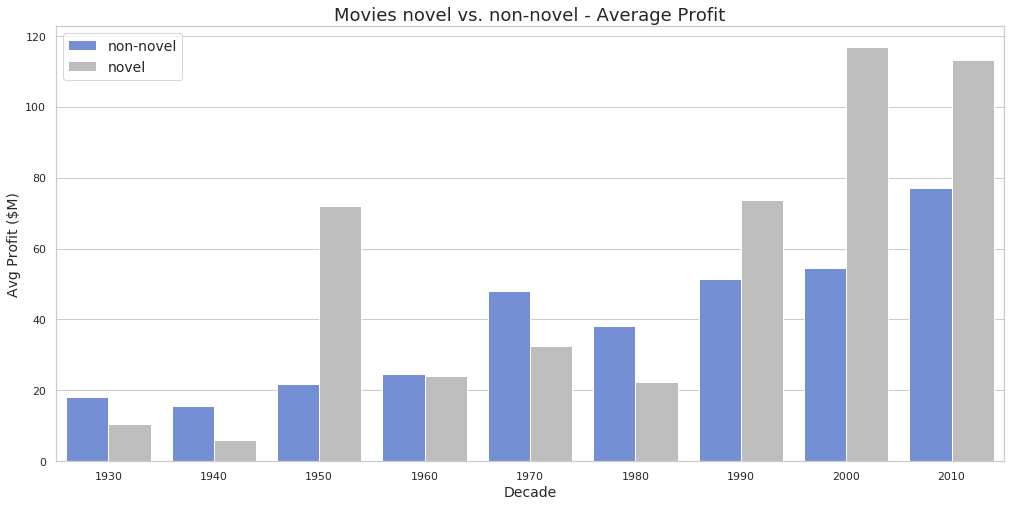

In [37]:
# Plot a comparison between novel and non-novel based movies for average profit
plot_novel_comparison(movies_novel_decade, 'profit_avg')

In [38]:
# Investigate 1950 outlier
movies_subset[(movies_subset['release_decade']==1950) & (
    movies_subset['is_novel_based'])][['title', 'budget ($M)', 'revenue ($M)', 'profit ($M)', 'roi (%)']]

,title,budget ($M),revenue ($M),profit ($M),roi (%)
992,Cinderella,2.90,263.591415,260.691415,9089.359138
3736,Shane,3.10,20.000000,16.900000,645.161290
4216,Macabre,0.09,5.000000,4.910000,5555.555556
4286,Moby Dick,4.50,10.400000,5.900000,231.111111


In [39]:
# Investigate top profitable novel vs. non-novel based movies
movies_subset['profit_rank'] = movies_subset.groupby('is_novel_based')['profit ($M)'].rank(ascending=False)

top_profitable = movies_subset[movies_subset['profit_rank'] <= 10].sort_values(
    by='profit ($M)', ascending=False)[['title', 'budget ($M)', 'revenue ($M)', 'profit ($M)', 'is_novel_based']]

top_profitable

,title,budget ($M),revenue ($M),profit ($M),is_novel_based
14514,Avatar,237.0,2787.965087,2550.965087,False
26429,Star Wars: The Force Awakens,245.0,2068.223624,1823.223624,False
1634,Titanic,200.0,1845.034188,1645.034188,False
24967,Jurassic World,150.0,1513.528810,1363.528810,False
28677,Furious 7,190.0,1506.249360,1316.249360,False
17759,The Avengers,220.0,1519.557910,1299.557910,False
17383,Harry Potter and the Deathly Hallows: Part 2,125.0,1342.000000,1217.000000,True
26432,Avengers: Age of Ultron,280.0,1405.403694,1125.403694,False
22012,Frozen,150.0,1274.219009,1124.219009,False
42845,Beauty and the Beast,160.0,1262.886337,1102.886337,True


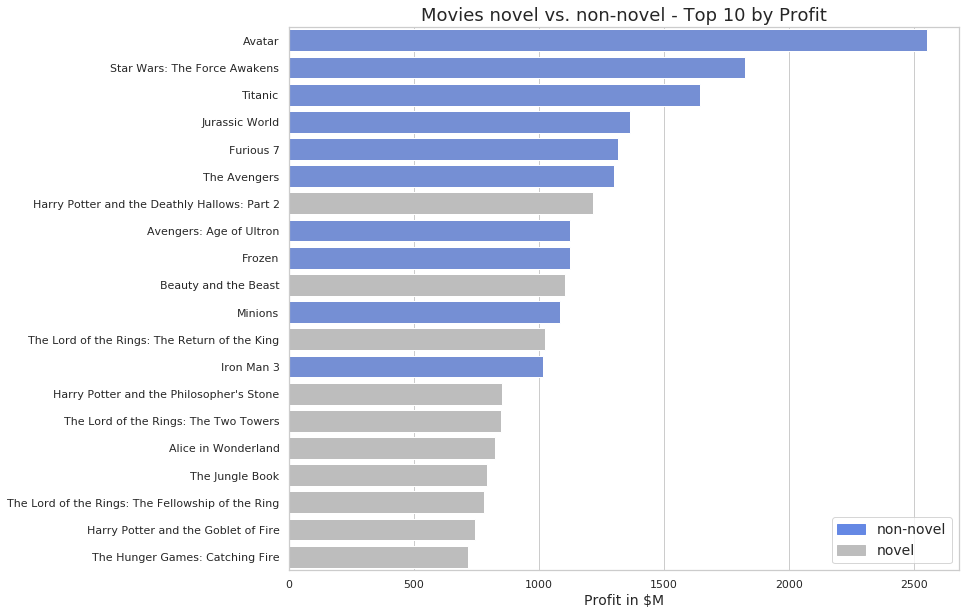

In [40]:
# Plot horizontal bar chart for top profitable movies
plot_top_profitable_movies(top_profitable)

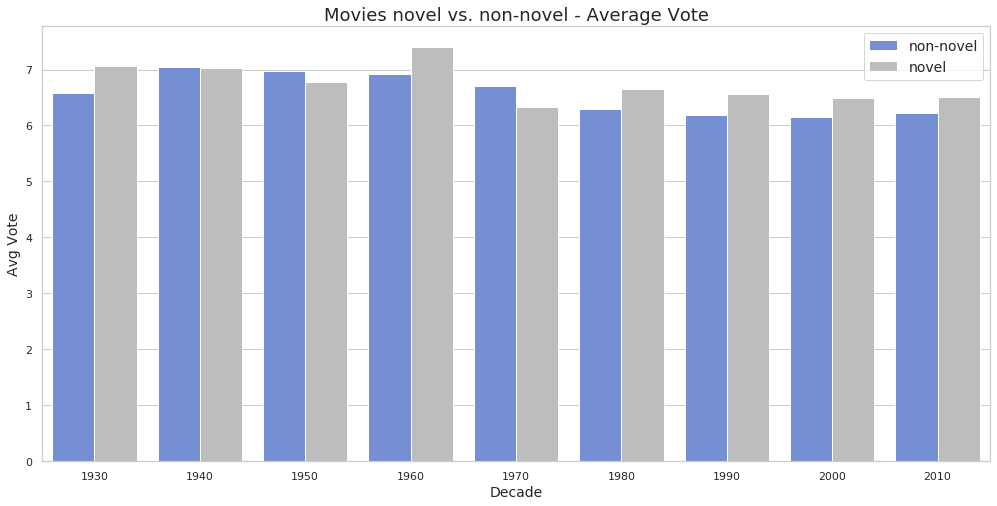

In [41]:
# Plot a comparison between novel and non-novel based movies for average vote
plot_novel_comparison(movies_novel_decade, 'vote_avg')

**Question 3: Which movies are the most expensive ones ever made and did the investment pay off?**

In [42]:
movies_subset['budget_rank'] = movies_subset['budget'].rank(ascending=False)

highest_budget = movies_subset[movies_subset['budget_rank'] <= 10].sort_values(
    by='budget', ascending=False)[['title', 'budget ($M)', 'revenue ($M)', 'profit ($M)', 'roi (%)']]

highest_budget_tidy = highest_budget.melt(
    id_vars='title', value_vars=['revenue ($M)', 'budget ($M)', 'profit ($M)'], var_name='metric')

highest_budget

,title,budget ($M),revenue ($M),profit ($M),roi (%)
17073,Pirates of the Caribbean: On Stranger Tides,380.0,1045.713802,665.713802,275.187843
11790,Pirates of the Caribbean: At World's End,300.0,961.000000,661.000000,320.333333
26432,Avengers: Age of Ultron,280.0,1405.403694,1125.403694,501.929891
11030,Superman Returns,270.0,391.081192,121.081192,144.844886
16083,Tangled,260.0,591.794936,331.794936,227.613437
18615,John Carter,260.0,284.139100,24.139100,109.284269
45417,Transformers: The Last Knight,260.0,604.942143,344.942143,232.670055
11743,Spider-Man 3,258.0,890.871626,632.871626,345.299080
21086,The Lone Ranger,255.0,89.289910,-165.710090,35.015651


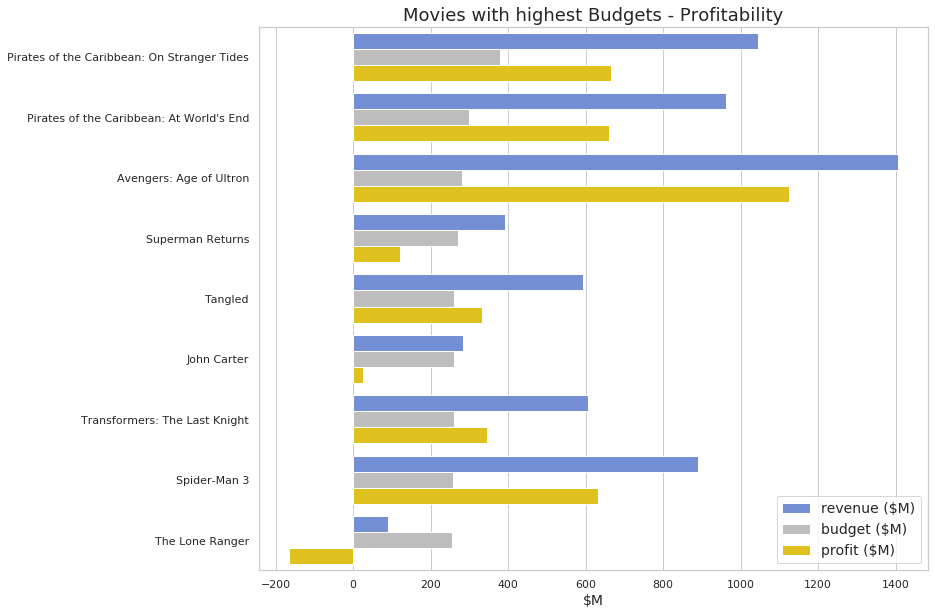

In [43]:
plot_movies_financials(highest_budget_tidy)

**Question 4: Which movies have the best return on investment?**

In [44]:
movies_subset['roi_rank'] = movies_subset['roi (%)'].rank(ascending=False)

highest_roi = movies_subset[movies_subset['roi_rank'] <= 10].sort_values(
    by='roi (%)', ascending=False)[['title', 'budget ($M)', 'revenue ($M)', 'profit ($M)', 'roi (%)']]

highest_roi

,title,budget ($M),revenue ($M),profit ($M),roi (%)
14158,Paranormal Activity,0.015000,193.355800,193.340800,1.289039e+06
8183,Tarnation,0.000218,1.162014,1.161796,5.330339e+05
2588,The Blair Witch Project,0.060000,248.000000,247.940000,4.133333e+05
4301,The Way of the Dragon,0.130000,85.000000,84.870000,6.538462e+04
2241,Pink Flamingos,0.012000,6.000000,5.988000,5.000000e+04
7761,Super Size Me,0.065000,28.575078,28.510078,4.396166e+04
31440,The Gallows,0.100000,42.664410,42.564410,4.266441e+04
9431,Open Water,0.130000,54.667954,54.537954,4.205227e+04
2338,The Texas Chain Saw Massacre,0.085000,30.859000,30.774000,3.630471e+04
1903,Bambi,0.858000,267.447150,266.589150,3.117100e+04


In [ ]:
plot_movies_roi(highest_roi)

### <a class="anchor" id="Evaluation">Part 5: Evaluation</a>

**How have movie genres evolved over time?**  

The first drama movie in the dataset has been produced during the 1890s and from the 1910s onwards drama has been the number 1 ranking movie genre based on the total number of movies. 

The first comedy movie has also been released during the 1890s and around 1900 the genre was even the top one. After comedy lost the battle for the pole position to drama it has been always number 2 genre. The third place on the winner's podium saw some battle over the time. Horror, romance, action and thriller genres all tried to get into the top 3 with some ups and downs, but since the 1990s thriller holds the third position.

What surprised me a bit is that documentary is nowadays on forth position after a huge climp up from position 15 in the 1980s. Looks like there has been a huge demand for documentary content.  

The bump chart also shows nicely that the time of western movies is long over. If you are interested in the reasons for this development you can find more information [here](https://www.looper.com/192132/the-real-reason-they-dont-make-westerns-anymore/).


**How do novel based movies compare to non-novel based movies?**

If you look at average profit you will notice that there has been a shift since the 1990s towards novel-based movies being more profitable. But there has been a huge outlier in the 1950s. What do you think which movie this was? If you want to know more follow this [link](https://www.themoviedb.org/movie/11224-cinderella?language=de).

Nevertheless you have to be careful here because the dataset for novel based movies is way smaller. Furthermore novel-based movies are often on a blockbuster-level while the non-novel based category also includes smaller productions. 

The comparison between the top 10 profitable movies of each category shows that almost all novel based movies are behind the non-novel based movies. 

In regards to average votes on TMDB  it is pretty close, with slightly better votes for novel based movies.

**Which movies are the most expensive ones ever made and did the investment pay off?**  

Nowadays movies have to offer a lot to compete and attract viewers. This is one reason why movies become more and more expensive to produce. But did it pay off for the movies with the highest budget? As you can see it looks like it paid off most of the time. The only loss in the top 10 list is [Lone Ranger](https://www.themoviedb.org/movie/57201-the-lone-ranger?language=en-US) and what a surprise it has a western setting. As we have learnt earlier this genre has a tough time these days.

**Which movies have the best return on investment?**  

Do you think you can produce a movie with less than \\$300? [Tarnation](https://www.themoviedb.org/movie/1435-tarnation) had an initial budget of \\$281 and earned over \\$1.000.000. That is a nice return on investment.   

But the best return on investment had [Paranormal Activity](https://www.themoviedb.org/movie/23827-paranormal-activity) in 2007. With an initial budget of just \\$15.000 it generated a profit of \\$190.000.000. The movie almost earned incredible 13000 times its budget.  

Another finding is that 5 out of the 10 top return on investment movies belong to the horror genre. The most expensive one of them had a budget of \\$100.000 and all horror movies earned multiple millions.

### <a class="anchor" id="Deployment">Part 6: Deployment</a>

Please find my summary for a non-technical audience in a blog post [here](https://medium.com/@langflo/once-upon-a-time-in-hollywood-78502cc290e9).

**Limitations of the analysis:**  

- The dataset is 3 years old, therefore the analysis is not quite up to date.
- Revenue and budget information is not adjusted for inflation.
- There could still be some incorrect information in the provided data.

**References:**

- https://www.themoviedb.org/
- https://www.kaggle.com/rounakbanik/the-movies-dataset
- https://www.kaggle.com/danofer/movies-data-clean
- https://stackoverflow.com/questions/47443670/how-to-dynamically-re-order-items-in-matplotlib-legend